In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [22]:
data = pd.read_csv("depression.csv", encoding='latin-1')
data.columns = ["target", "id", "date", "flag", "user", "text"]
data.head(5)

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [23]:
data.drop(["id", "date", "flag", "user"], axis=1, inplace=True)
data.head()

,target,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


<AxesSubplot:>

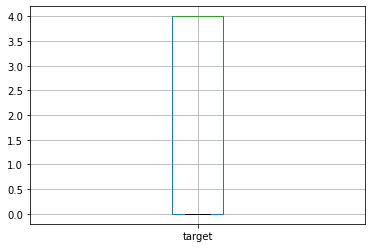

In [24]:
plt.figure()
data.boxplot(column="target")

<AxesSubplot:>

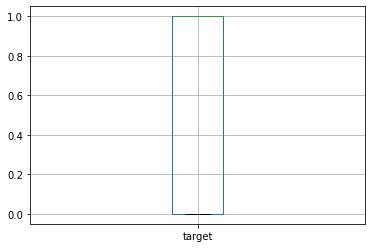

In [25]:
data['target'] = data['target'] / 4
plt.figure()
data.boxplot(column="target")

In [26]:
data = shuffle(data)
data.head()

,target,text
975558,1.0,@joeldavies ah yup twould be nice if it used b...
683073,0.0,@joshsharp put it on YouTube. I wanna view it...
1555341,1.0,@AlyYvonneG send me the link I will join and i...
163949,0.0,ipod touch: worth the money? because i'm think...
130712,0.0,@JunkFoodTees Weekend great today i'm not feel...


In [27]:
data = data.iloc[:100000]

In [28]:
feature = data['text'].to_numpy()
target = data['target'].to_numpy()

In [29]:
X, X_test, y, y_test = train_test_split(feature, target, test_size=0.2, shuffle=True, random_state=8)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=8)

In [30]:
print("Sample size for Training", len(X_train))
print("Sample size for Validation", len(X_val))
print("Sample size for Testing", len(X_test))

Sample size for Training 60000
Sample size for Validation 20000
Sample size for Testing 20000


In [31]:
max_features = 10000
sequence_length = 250
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens = max_features,
    output_mode = 'int',
    output_sequence_length = sequence_length
)

In [32]:
vectorize_layer.adapt(X_train)

In [33]:
def vectorize_text(text):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text)

In [34]:
first_tweet = feature[0]
print(first_tweet)
a = vectorize_text(first_tweet)
a

@joeldavies ah yup twould be nice if it used both cores 


<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[   1,  449, 1000,    1,   23,  134,   69,   10,  484,  454,    1,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,   

In [35]:
embedding_dim = 16

model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(max_features+1, embedding_dim),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 250)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 250, 16)           160016    
                                                                 
 dropout_2 (Dropout)         (None, 250, 16)           0         
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [36]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             optimizer='adam',
             metrics=['accuracy'])

In [37]:
epochs = 10

history = model.fit(
        x=X_train,
        y=y_train,
        validation_data=(X_val,y_val),
        epochs=epochs)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6841 - accuracy: 0.4983 - val_loss: 0.6660 - val_accuracy: 0.5034
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6340 - accuracy: 0.5483 - val_loss: 0.6087 - val_accuracy: 0.6213
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5820 - accuracy: 0.6520 - val_loss: 0.5690 - val_accuracy: 0.6580
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5460 - accuracy: 0.7011 - val_loss: 0.5410 - val_accuracy: 0.7125
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5199 - accuracy: 0.7274 - val_loss: 0.5236 - val_accuracy: 0.7436
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5010 - accuracy: 0.7426 - val_loss: 0.5090 - val_accuracy: 0.7426
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4862 - accuracy: 0.7567 - val_loss: 0.5009 - val_ac

In [38]:
loss, accuracy = model.evaluate(X_test, y_test)

625/625 [==============================] - 1s 2ms/step - loss: 0.4944 - accuracy: 0.7704


In [42]:
model.predict([["I want help"],["I am very Happy"]])

array([[-0.58827597],
       [ 1.4659961 ]], dtype=float32)

In [21]:
history.history

{'loss': [0.6931416988372803,
  0.6921464800834656,
  0.6910910606384277,
  0.6896637082099915,
  0.6878493428230286,
  0.6846603751182556,
  0.6807253360748291,
  0.6753888130187988,
  0.66922926902771,
  0.6611942052841187],
 'accuracy': [0.503000020980835,
  0.503000020980835,
  0.503000020980835,
  0.503000020980835,
  0.503000020980835,
  0.503000020980835,
  0.503000020980835,
  0.503000020980835,
  0.503000020980835,
  0.503333330154419],
 'val_loss': [0.6926478743553162,
  0.6922627687454224,
  0.6912028789520264,
  0.6896223425865173,
  0.6877448558807373,
  0.68425452709198,
  0.6811262965202332,
  0.6757969856262207,
  0.6713806390762329,
  0.6641385555267334],
 'val_accuracy': [0.4869999885559082,
  0.4869999885559082,
  0.4869999885559082,
  0.4869999885559082,
  0.4869999885559082,
  0.4869999885559082,
  0.4869999885559082,
  0.4869999885559082,
  0.4869999885559082,
  0.48750001192092896]}